### Walmart Black Friday Data Analysis

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

User_ID

Product_ID

Gender - sex of a customer

Age - age in bins

Occupation (masked)

City_Category - category of the city [A, B, C]

Stay_In_Current_City_Years: number of years a customer stays in their current city

Marital_Status

Product_Category (masked)

Purchase - purchase amount

Import Statements

In [2]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


Understanding the data

In [3]:
df = pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


Changing datatypes  
 - Converting to categories where required
 - Converting Gender and Marital Status to Boolean
     - Male - 0, Female - 1
     - Marital Status - 0 and 1

In [7]:
category_cols = ["Age","Occupation","City_Category","Stay_In_Current_City_Years","Product_Category"]
df[category_cols] = df[category_cols].astype('category')


In [8]:
df["Gender"] = df["Gender"].apply(lambda x: 0 if x=="M" else 1)

In [9]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                           int64
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category              category
Purchase                         int64
dtype: object

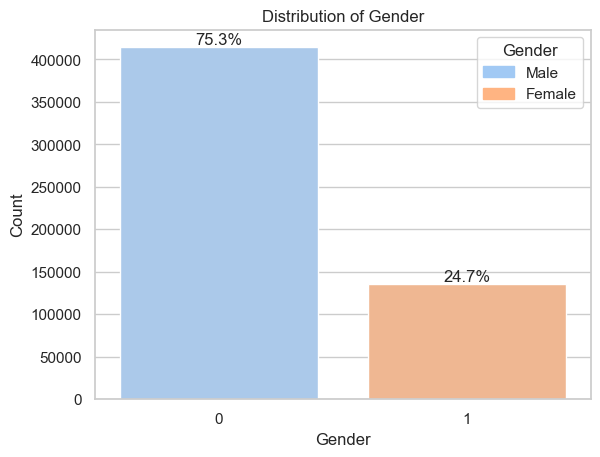

In [10]:
#understanding gender distribution

sns.set(style="whitegrid")

ax = sns.countplot(x='Gender', data=df,  palette='pastel')

total = len(df['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')



plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

female_patch = mpatches.Patch(color=sns.color_palette('pastel')[1], label='Female')
male_patch = mpatches.Patch(color=sns.color_palette('pastel')[0], label='Male')

ax.legend(handles=[ male_patch,female_patch], title='Gender')

plt.show()

In [11]:
#check male and female percentages in the data set
male = df[df['Gender']==0]
female = df[df['Gender']==1]
male_per = len(male)/(len(male)+len(female))
female_per = len(female)/(len(male)+len(female))
print(male_per, female_per)

0.7531050706458111 0.24689492935418894


Text(0.5, 1.0, 'Distribution of Age')

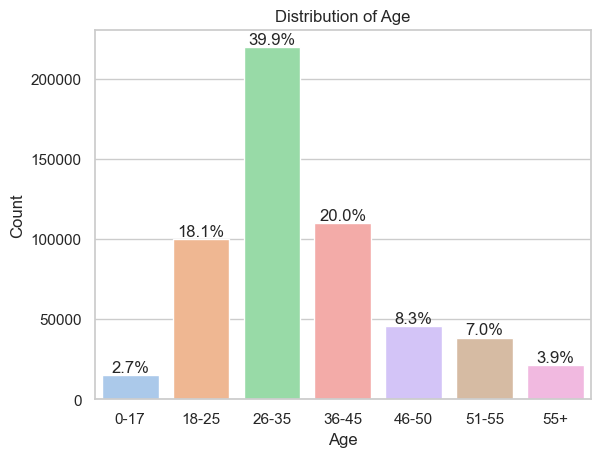

In [12]:
sns.set(style="whitegrid")

ax = sns.countplot(x='Age', data=df,  palette='pastel')
total = len(df['Age'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

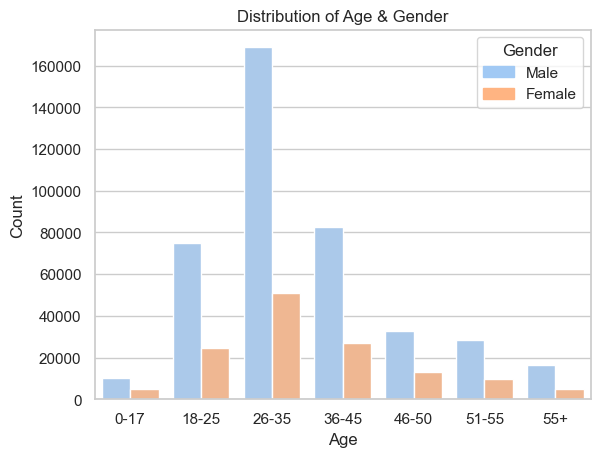

In [13]:
sns.set(style="whitegrid")

ax = sns.countplot(x='Age',hue="Gender", data=df,  palette='pastel')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age & Gender')

female_patch = mpatches.Patch(color=sns.color_palette('pastel')[1], label='Female')
male_patch = mpatches.Patch(color=sns.color_palette('pastel')[0], label='Male')

ax.legend(handles=[ male_patch,female_patch], title='Gender')

Text(0.5, 1.0, 'Distribution of Marital Status & Gender')

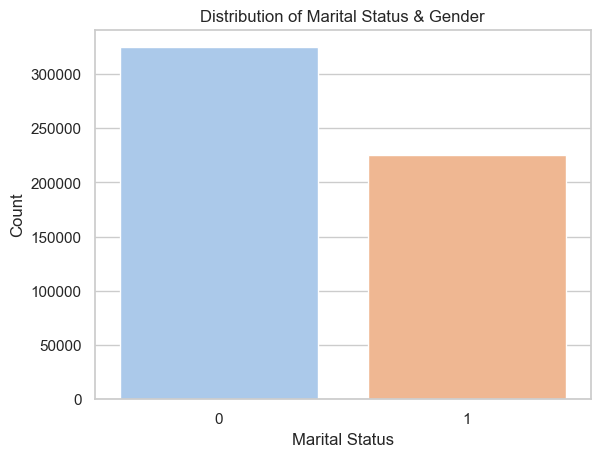

In [25]:
sns.set(style="whitegrid")

ax = sns.countplot(x='Marital_Status', data=df,  palette='pastel')


plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status & Gender')

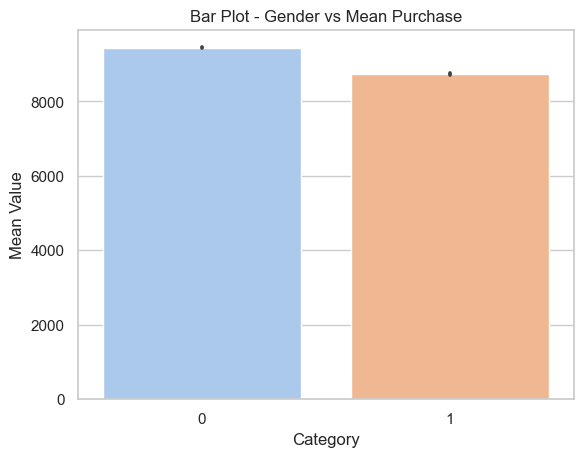

In [14]:
sns.set(style="whitegrid")

ax = sns.barplot(x='Gender', y='Purchase', data=df, palette='pastel')

    
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Bar Plot - Gender vs Mean Purchase')

plt.show()

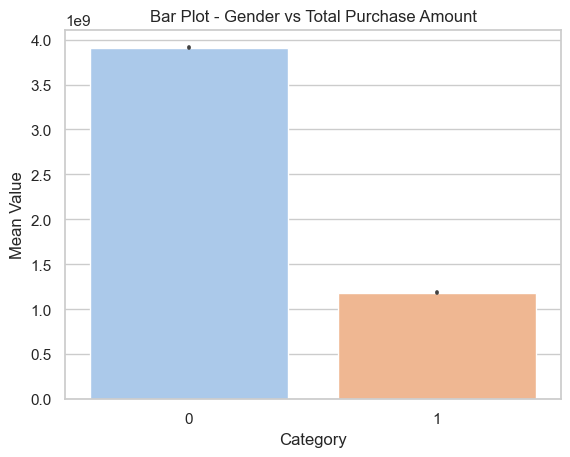

In [15]:
sns.set(style="whitegrid")

sns.barplot(x='Gender', y='Purchase', estimator= 'sum', data=df, palette='pastel')

plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Bar Plot - Gender vs Total Purchase Amount')

plt.show()

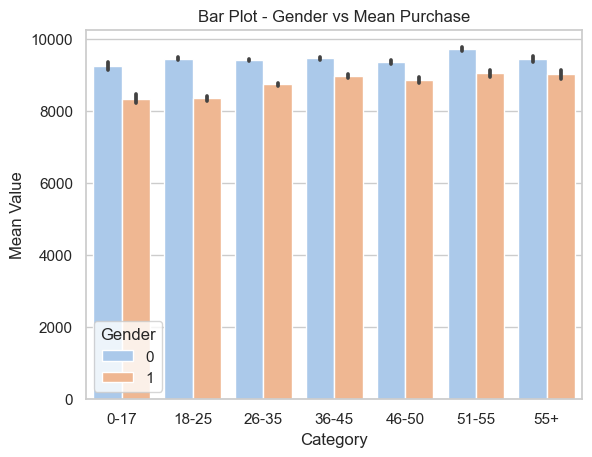

In [16]:
sns.set(style="whitegrid")

sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, palette='pastel')

plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Bar Plot - Gender vs Mean Purchase')

plt.show()

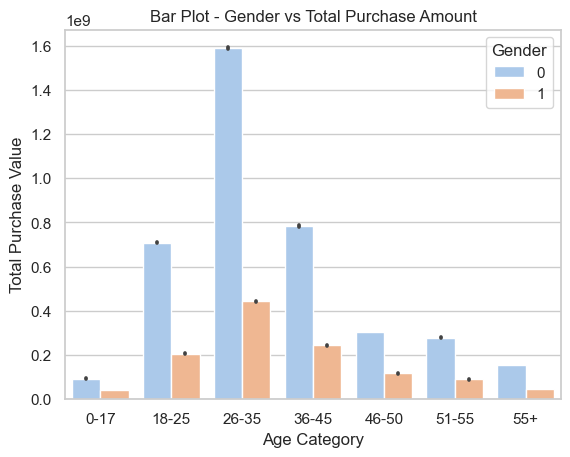

In [17]:
sns.set(style="whitegrid")

sns.barplot(x='Age', y='Purchase', hue='Gender', estimator = 'sum', data=df, palette='pastel')

plt.xlabel('Age Category')
plt.ylabel('Total Purchase Value')
plt.title('Bar Plot - Gender vs Total Purchase Amount')

plt.show()

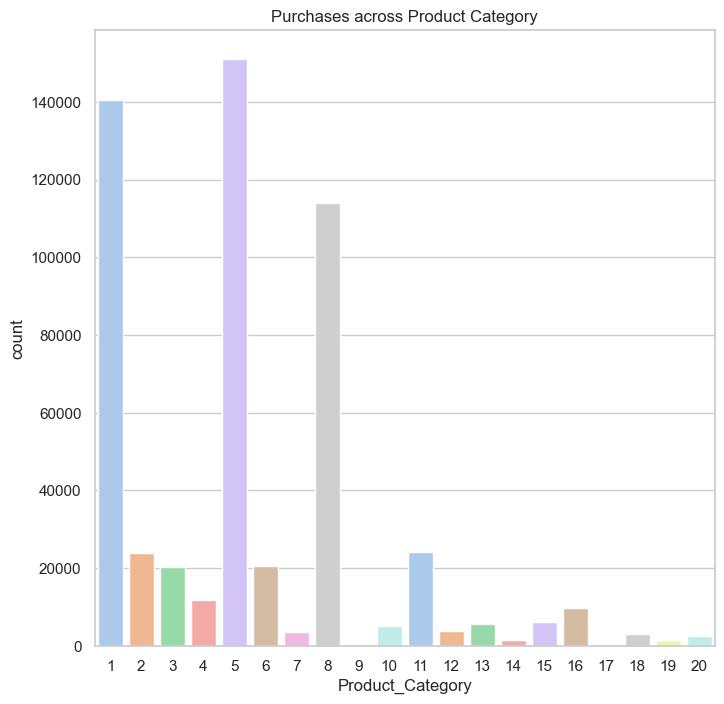

In [18]:
#understanding the frequencies of product purchases

plt.figure(figsize=(8, 8))
sns.countplot(x='Product_Category', data=df, palette='pastel')
plt.title('Purchases across Product Category')

# Show the pie chart
plt.show()
  

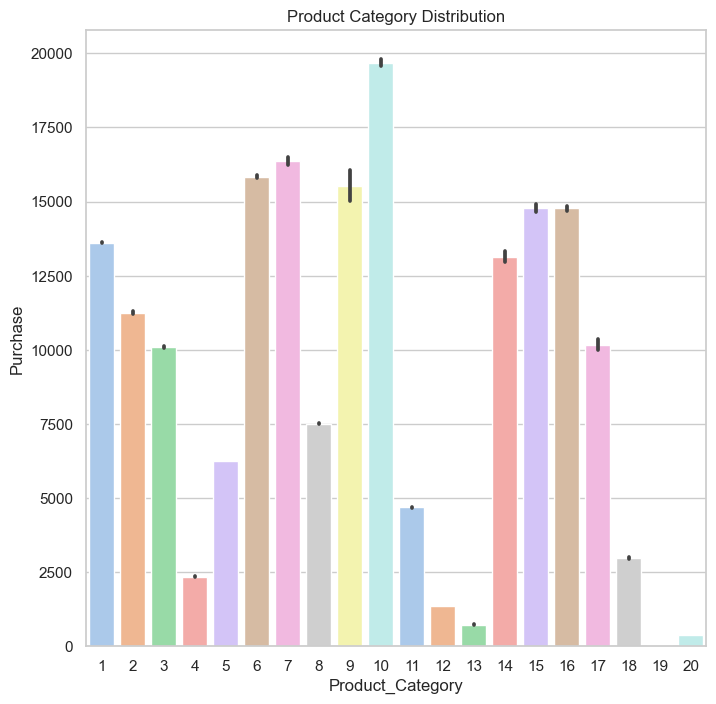

In [26]:
#understanding the mean
plt.figure(figsize=(8, 8))
sns.barplot(x='Product_Category', y= "Purchase", data=df, palette='pastel')
plt.title('Product Category Distribution')

# Show the pie chart
plt.show()

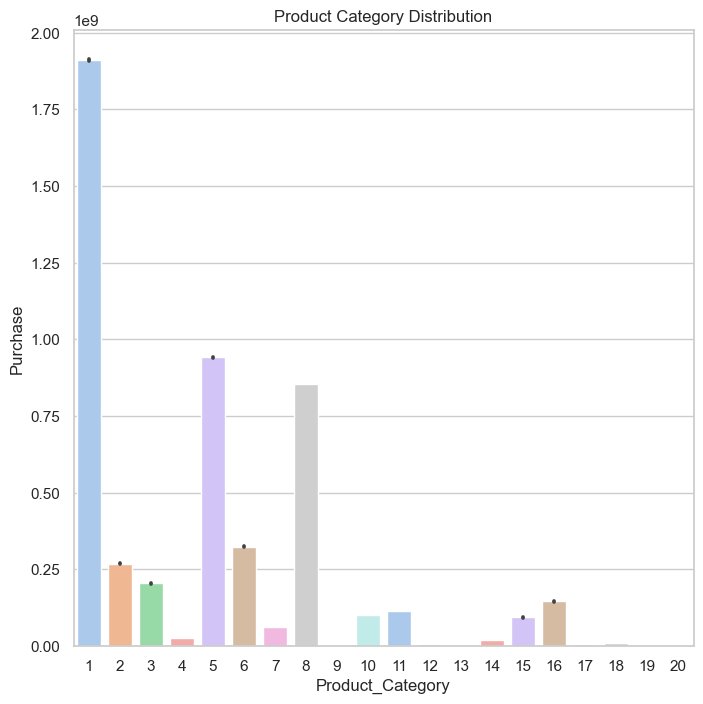

In [19]:
#Can there be a relation between a product category and the amount of purchase - since it would be particularly useful when
#a gender is also spending more in general but it's because the category they're buying is expensive


# Plotting the pie chart
plt.figure(figsize=(8, 8))
sns.barplot(x='Product_Category', y= "Purchase", estimator = "sum", data=df, palette='pastel')
plt.title('Product Category Distribution')

# Show the pie chart
plt.show()
 

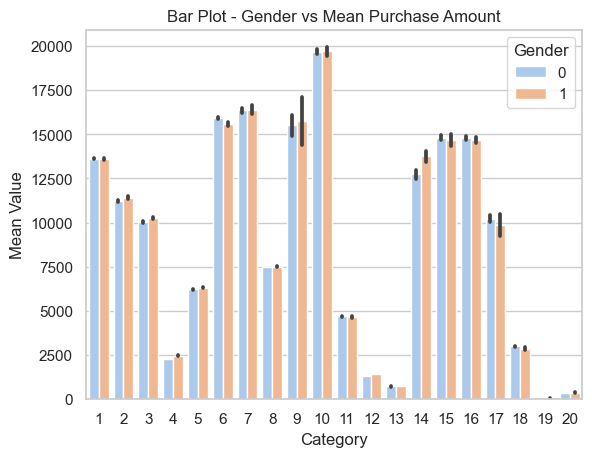

In [28]:
#understanding the relation between product category and gender
sns.set(style="whitegrid")

sns.barplot(x='Product_Category', y='Purchase', hue='Gender', data=df, palette='pastel')

plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Bar Plot - Gender vs Mean Purchase Amount')

plt.show()


1. Exploratory Data Analysis (EDA) reveals that during the Black Friday event at Walmart, 75% of shoppers are male, while 25% are female.

2. The predominant age group among shoppers is 26-35, constituting 39.9% of the total, closely followed by ages 36-45 at 20% and 18-25 at 18.1%.

3. Although total purchases and spending are higher among men, it's essential to acknowledge that the male distribution in the dataset is also greater. When considering the mean purchase amount, men and women exhibit nearly identical spending patterns.

4. Product Categories 1, 5, and 8 emerge as the most popular in terms of both purchases and expenditure. Conversely, when examining mean purchase amounts, Category 10 stands out as the most economical, followed by Categories 7, 6, and 9.

5. Male and female purchase behaviors demonstrate striking similarities, with the most favored categories being 6, 7, 9, and 10.

Marketing Strategies:


1. Target promotions and discounts specifically for Product Categories 1, 5, and 8, capitalizing on their popularity and high spending.

2. Design marketing campaigns tailored to the 26-35 age group, with additional focus on 36-45 and 18-25 segments for maximum impact.

3. Develop gender-neutral promotions and advertisements, highlighting universal product appeal to cater to the diverse shopper base.

4. Introduce bundle deals featuring products from Category 10, emphasizing cost-effectiveness to attract budget-conscious shoppers.

5. Enhance the online shopping experience with interactive and personalized features, leveraging common purchase behaviors in categories 6, 7, 9, and 10.


